<a href="https://colab.research.google.com/github/Eugenia27/AnalisisYCuracion/blob/master/AnalisisYCuracion_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISIS Y CURACIÓN DE DATOS 
##PRÁCTICO 1

*Ferraro, Ma. Eugenia y Trógolo, Nair*



# LIBRERÍAS Y AJUSTES GRÁFICOS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import cm
from matplotlib.ticker import NullFormatter
from matplotlib import rc
import sys
style.use('bmh')

In [0]:
rc('font',**{'size':14})
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rc('xtick', labelsize=14)    
plt.rc('ytick', labelsize=14) 


# EJERCICIO 1: Tablas de Crecimiento

In [4]:
url   = 'https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/wtageinf.csv' 
pesos = pd.read_csv(url)
pesos.head(4)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250


In [0]:
percentiles = pesos.columns[5:]

In [0]:
cmap = cm.get_cmap('Spectral')

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


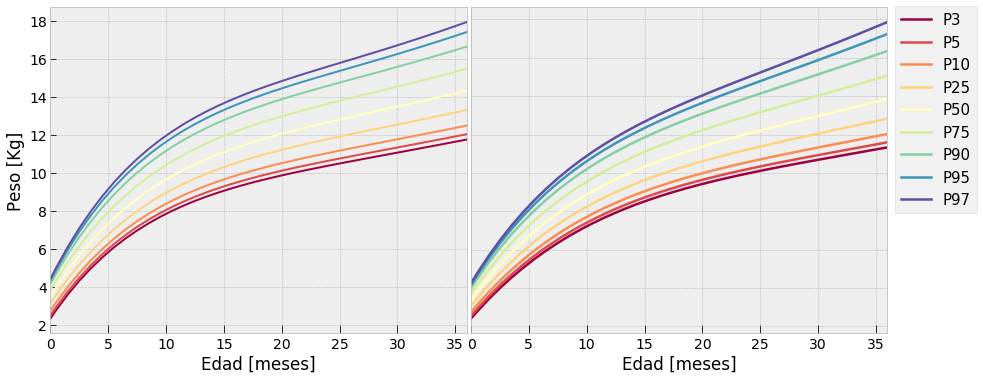

In [7]:
fig = plt.figure(figsize=(15,6))

ax1 = fig.add_subplot(121)
pesos[pesos.Sex==1].set_index('Agemos')[percentiles].plot(label='niños',ax=ax1,legend=False,cmap=cmap,lw=2)
plt.xlabel('Edad [meses]')
plt.ylabel('Peso [Kg]')

ax2 = fig.add_subplot(122)
pesos[pesos.Sex==2].set_index('Agemos')[percentiles].plot(label='niñas',ax=ax2,cmap=cmap,lw=2.5)
plt.legend(bbox_to_anchor=(0.999, 1.025),fancybox=False)
plt.xlabel('Edad [meses]')
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.tick_params(left="off")


fig.subplots_adjust(wspace=0.01)

# EJERCICIO2: Pasos Fronterizos

In [8]:
url = 'https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/pasos.json'
pasosFronterizos = pd.read_json(url)
pasosFronterizos.head(4)

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego


In [9]:
pasosFronterizos.province.unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Córdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

In [0]:
aeropuerto=pasosFronterizos.province.sort_values().unique()[0]
pasosFronterizos.province = pasosFronterizos.province.str.replace(aeropuerto,'Aeropuerto PCNF')
pasosFronterizos.province = pasosFronterizos.province.str.replace('Córdoba','Cordoba')
pasosFronterizos.province = pasosFronterizos.province.str.replace('NEUQUEN','Neuquen')

Text(0, 0.5, 'Número de Pasos Fronterizos')

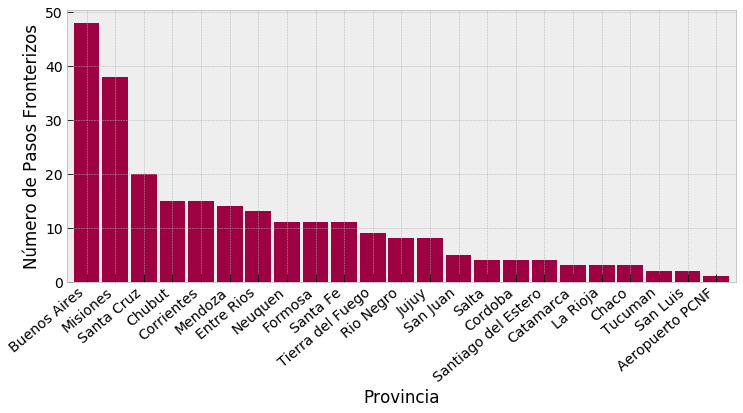

In [11]:
plt.figure(figsize=(12,5))
ax=pasosFronterizos.groupby('province').province.count().sort_values(ascending=False).plot(kind='bar',width=0.9,cmap=cmap)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Provincia')
plt.ylabel('Número de Pasos Fronterizos')

# EJERCICIO 3: Limpieza de Datos

i) Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [12]:
url = 'https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201801.csv'
kickstarter_2018 = pd.read_csv(url)
kickstarter_2018.head(1)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95


In [0]:
duplicados = kickstarter_2018[kickstarter_2018.duplicated('name',keep=False)][['ID','name','category','main_category','currency','launched','deadline']].sort_values('name')

In [56]:
duplicados.head(6)

,ID,name,category,main_category,currency,launched,deadline
342920,816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2013-12-19 21:51:50,2014-02-09
342692,815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-01-03 20:39:16,2014-03-01
2024,1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-08-28 21:27:52,2011-09-25
322671,713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-01-26 03:51:47,2013-03-27
173036,1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-06-27 02:02:00,2015-08-26
265864,422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-04-14 00:08:52,2017-05-14


In [0]:
from hashlib import md5

In [17]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()


duplicados['name'].apply(hashit).head(12)

342920    0c7a251ffe4c7834cbc4b04906952ff1
342692    0c7a251ffe4c7834cbc4b04906952ff1
2024      67554ab4203d95f2f2f05365f768206e
322671    67554ab4203d95f2f2f05365f768206e
173036    19a82bc4c5961834282575d07d9b5f7c
265864    19a82bc4c5961834282575d07d9b5f7c
352573    b4ca2044f21f67e13ddb7583f59189a7
149726    b4ca2044f21f67e13ddb7583f59189a7
196363    bed6c6cbc0540c8d40b7e2311806cc5c
353421    bed6c6cbc0540c8d40b7e2311806cc5c
81299     24873b2974fe8222256c6cc800a2b361
125533    24873b2974fe8222256c6cc800a2b361
Name: name, dtype: object

In [0]:
urlfp='https://raw.githubusercontent.com/Eugenia27/AnalisisYCuracion/master/input/kickstarter-projects/ks-projects-201801-for-pandas.csv'
kickstarter_2018_iso    = pd.read_csv(url,encoding='iso-8859-1',index_col='ID',parse_dates=['deadline','launched'])
kickstarter_2018_pandas = pd.read_csv(urlfp,index_col='ID',parse_dates=['deadline','launched'])


In [24]:
if 'ftfy' not in sys.modules:
    !pip install 'ftfy<5.6'
    
import ftfy.badness as bad

     |████████████████████████████████| 51kB 2.1MB/s 


In [0]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

In [42]:
kickstarter_2018_pandas['name_weirdness'] = kickstarter_2018_pandas['name'].apply(weird)
kickstarter_2018_pandas[kickstarter_2018_pandas['name_weirdness'] > 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1221990593,Support PMCD´s ¨From a Different Clay¨,Dance,Dance,USD,2011-06-08,1500.0,2011-04-28 05:15:32,1940.00,successful,27,US,1940.00,1940.00,1500.00,3
1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.0,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,2
124795481,µGALE (Canceled),Wearables,Technology,EUR,2015-04-17,18000.0,2015-02-16 01:55:34,10.00,canceled,2,NL,11.39,10.81,19465.14,2
1468489999,µCurrent GOLD - Precision Multimeter Current A...,Hardware,Technology,AUD,2013-12-31,9900.0,2013-12-17 10:28:09,116575.17,successful,1268,AU,104343.69,104871.51,8906.08,2
1610503461,µPeek - The Professional Microscope that Fits ...,Technology,Technology,CHF,2016-01-09,125000.0,2015-12-10 10:08:18,247688.14,successful,1435,CH,249249.19,246848.85,124576.44,2
16174550,PARALELO 19 Nº,Photography,Photography,MXN,2017-04-15,15000.0,2017-03-01 00:00:24,3340.00,failed,8,MX,0.00,177.36,796.52,2
1719215256,Kickstarter Gold: Manual Coffeemaker Nº3,Product Design,Design,USD,2017-07-22,60000.0,2017-06-20 15:29:56,68587.33,successful,618,US,21002.00,68587.33,60000.00,2
1837094178,¨Midgard's taigh-seinnse/ Eröffnung Mittelalte...,Restaurants,Food,CHF,2016-09-29,50000.0,2016-08-30 09:36:42,150.00,failed,1,CH,0.00,153.93,51310.47,2
2056123754,ZEIº - the most simple time tracking solution,Technology,Technology,EUR,2016-10-26,75000.0,2016-09-20 15:54:49,313637.00,successful,3140,AT,9451.58,342555.54,81915.29,2


In [43]:
kickstarter_2018_iso['name_weirdness'] = kickstarter_2018_iso['name'].apply(weird)
kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness'] > 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.0,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.0,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.0,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.0,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.0,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4
1001042227,Via ChicâOneClutchâ¢,Product Design,Design,USD,2015-08-14,75000.0,2015-06-30 03:47:54,1736.00,failed,21,US,1736.00,1736.00,75000.00,6
1001484182,Daweyu Hills â Crop to Cup,Drinks,Food,USD,2015-10-15,25000.0,2015-09-15 21:01:47,25816.00,successful,172,US,25816.00,25816.00,25000.00,4
1001490622,TimeChatâ¢ (Canceled),Apps,Technology,AUD,2014-10-24,33000.0,2014-09-23 21:05:58,1110.00,canceled,5,AU,991.48,976.08,29018.64,2
1002098978,Lux3 â Wellness Lamp,Product Design,Design,EUR,2016-05-05,150000.0,2016-03-21 17:23:46,491.00,failed,16,IT,553.34,561.07,171405.06,4


In [44]:
len(kickstarter_2018_pandas[kickstarter_2018_pandas['name_weirdness'] > 1]),len(kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness'] > 1])

(26, 7682)

In [0]:
from sklearn import preprocessing

In [46]:
kickstarter_2018_pandas.describe(include=['O'])

,name,category,main_category,currency,state,country
count,378657,378661,378661,378661,378661,378661
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22314,63585,295365,197719,292627


In [47]:


column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018_pandas[column])



LabelEncoder()

In [48]:
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [49]:
# Apply the fitted encoder to the pandas column
kickstarter_2018_pandas[column] = le.transform(kickstarter_2018_pandas[column]) 
kickstarter_2018_pandas.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [50]:
# Reversing encoding
kickstarter_2018_pandas[column] = le.inverse_transform(kickstarter_2018_pandas[column]) 
kickstarter_2018_pandas.head()



,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,0
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,0
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,0
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,0
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,0


In [51]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018_pandas[column])
pd.DataFrame(lb_results, columns=((column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1



Ejercicio 5

    ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
    Calcular una tabla con la cantidad de proyectos por categoría principal y estado.





In [64]:
kickstarter_2018.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [83]:
dim  = len(kickstarter_2018_pandas)
dim2 = len(kickstarter_2018_pandas[(kickstarter_2018_pandas.state=='successful')])
dim,dim2

(378661, 133956)

In [0]:
dim2=len(kickstarter_2018_pandas[(kickstarter_2018_pandas.state=='successful')])

In [0]:
dimExitososNoAlcObj = len(kickstarter_2018_pandas[(kickstarter_2018_pandas.state=='successful') & ( (kickstarter_2018_pandas.pledged < kickstarter_2018_pandas.goal))])
dimExitososSiAlcObj = len(kickstarter_2018_pandas[(kickstarter_2018_pandas.state=='successful') & ( (kickstarter_2018_pandas.pledged >= kickstarter_2018_pandas.goal))])

In [82]:
print('Exitosos que:\n--No Alcanzaron el Objetivo: ',round(dimExitososNoAlcObj*100/dim2,3),'%\n--Sí Alcanzaron el Objetivo: ',round(dimExitososSiAlcObj*100/dim2,3),'%' )

Exitosos que:
--No Alcanzaron el Objetivo:  0.004 %
--Sí Alcanzaron el Objetivo:  99.996 %


In [81]:
print('Exitosos que:\n--No Alcanzaron el Objetivo: ',round(dimExitososNoAlcObj*100/dim,3),'% del total\n--Sí Alcanzaron el Objetivo: ',round(dimExitososSiAlcObj*100/dim,3),'% del total' )

Exitosos que:
--No Alcanzaron el Objetivo:  0.001 % del total
--Sí Alcanzaron el Objetivo:  35.375 % del total


In [87]:
kickstarter_2018_pandas.groupby(['category','state'])['name'].count().reset_index(name='total')

,category,state,total
0,3D Printing,canceled,91
1,3D Printing,failed,326
2,3D Printing,live,8
3,3D Printing,successful,242
4,3D Printing,suspended,15
5,3D Printing,undefined,1
6,Academic,canceled,115
7,Academic,failed,589
8,Academic,live,11
9,Academic,successful,188


Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [96]:
q1 = kickstarter_2018_pandas.usd_goal_real.quantile(q=0.25)
q2 = kickstarter_2018_pandas.usd_goal_real.quantile(q=0.50)
q3 = kickstarter_2018_pandas.usd_goal_real.quantile(q=0.75)

iq = q3-q1
bs = q3+1.5*iq
bi = q1-1.5*iq

print('Bigote Inferior: ',round(bi,2),'\nBigote Superior: ',round(bs,2))

Bigote Inferior:  -18250.0 
Bigote Superior:  35750.0


In [99]:
kickstarter_2018_pandas.usd_goal_real.min()

0.01

In [105]:
valoresAtipicos = kickstarter_2018_pandas[kickstarter_2018_pandas.usd_goal_real>bs]
valoresAtipicos[['category','usd_goal_real']]

,category,usd_goal_real
ID,,
1000004038,Narrative Film,45000.00
1000014025,Restaurants,50000.00
1000034518,Product Design,125000.00
100004195,Documentary,65000.00
1000056157,Games,200000.00
100011318,Animation,50000.00
1000183112,Restaurants,40000.00
1000201265,Narrative Film,60000.00
1000230071,Webseries,60000.00


In [0]:
colores=[]
c=0
for i in range(16):
  c=c+i*i*1/100
  colores.append(cmap(c))
  

In [0]:
categorias=kickstarter_2018_pandas[['category','main_category']].drop_duplicates('category')
dicCatMCat = dict(zip(categorias.category.values, categorias.main_category.values))
dicMCatColor = dict(zip(categorias.main_category.unique(),colores))

In [0]:
custom_palette = {}
i=0
for q in set(kickstarter_2018_pandas.category):
    mc=dicCatMCat[q]
    custom_palette[q] = dicMCatColor[mc]

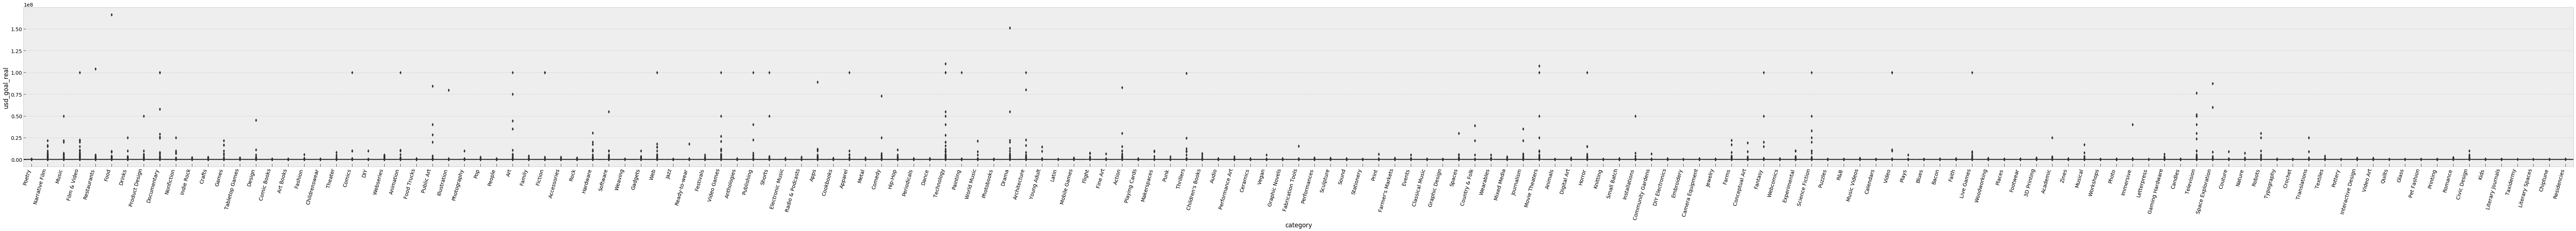

In [268]:
plt.figure(figsize=(125,8))
ax=sb.boxplot(x="category", y="usd_goal_real",data=kickstarter_2018_pandas,
              fliersize=5,notch=True,width=1, palette=custom_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.show()

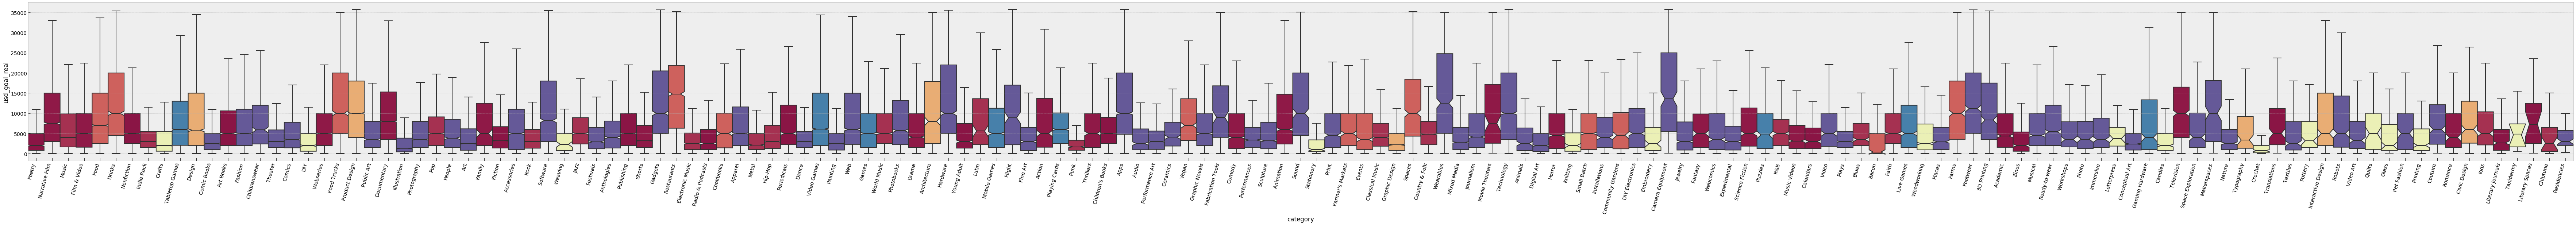

In [264]:
plt.figure(figsize=(125,8))
ax=sb.boxplot(x="category", y="usd_goal_real",data=kickstarter_2018_pandas[kickstarter_2018_pandas.usd_goal_real<=bs],
              fliersize=0.001,notch=True,width=1, palette=custom_palette)
ax.set_xticklabels(ax.get_xticklabels(), rotation=75, ha="right")
plt.show()